In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
# new dataset, handwritten digits!
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [4]:
len(digits.data)      # 1,797 observations

1797

In [5]:
len(digits.data[0])   # 8 x 8 pixel image 
                      # >> so for any single observation, 64 different features

64

In [11]:
digits.images[-5]

array([[  0.,   0.,   4.,  10.,  13.,   6.,   0.,   0.],
       [  0.,   1.,  16.,  14.,  12.,  16.,   3.,   0.],
       [  0.,   4.,  16.,   6.,   3.,  16.,   4.,   0.],
       [  0.,   0.,  12.,  16.,  16.,  16.,   5.,   0.],
       [  0.,   0.,   0.,   4.,   4.,  16.,   8.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  15.,   5.,   0.],
       [  0.,   0.,   5.,   7.,   7.,  16.,   4.,   0.],
       [  0.,   0.,   2.,  14.,  15.,   9.,   0.,   0.]])

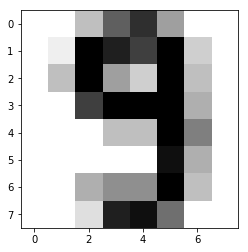

In [6]:
# the number 9
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')

In [7]:
digits.target[-5]# 9

9

In [8]:
digits_X, digits_y = digits.data, digits.target

In [9]:
digits_X.shape

(1797, 64)

In [10]:
# What if we just use logistic regression without doing anything?
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, digits_X, digits_y, cv=5, scoring='accuracy').mean()
# OK not bad!!!

0.92101881133607011

In [12]:
# Let's try a SVM
clf = svm.SVC()
print cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

clf = svm.SVC(kernel='linear')
print cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()
# OOF, we even lost to the logistic regression....
# hmm we know that this defaults to the Gaussian (aka radial basis function)
# let's try something else

0.448786800616
0.949334872621


# Gaussian has two parameters, gamma and C
Intuitively, the gamma parameter defines how far the influence of a 
single training example reaches, with low values meaning ‘far’ and 
high values meaning ‘close’. 

## gamma: 
coefficient only for ‘rbf’. The higher the value of gamma, the more it will try to exactly fit the training data set. Will cause over-fitting problem.


small gamma: the model is constrained, can under-fit!  high bias and low variance.

big gamma: Tries to capture the shape too well: can over-fit!  low bias and high variance.

<img src="http://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_15.png">



## C: 
Penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. C can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector


small C: makes the decision surface smooth and simple, softer margin can under-fit! high bias and low variance.

big C: selects more support vectors: can over-fit! harder margin. low bias and high variance.

<img src="http://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_18.png">


In [11]:
# note the scale of gamma and C
clf = svm.SVC(gamma=0.001, C=1)
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.9716361987950688

# Skadoosh!

In [12]:
# Warning SLOWWWWW
from sklearn.grid_search import GridSearchCV
clf = svm.SVC(C=1)
gamma_range = 10.**np.arange(-5, 2)
param_grid = dict(gamma=gamma_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(digits_X, digits_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [13]:
# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid_mean_scores

[0.89983305509181966,
 0.95492487479131882,
 0.97885364496382865,
 0.73678352810239289,
 0.10294936004451864,
 0.11185308848080133,
 0.10127991096271564]

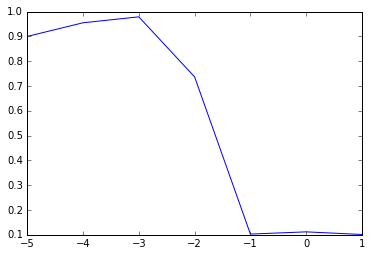

In [14]:
# plot the results
import matplotlib.pyplot as plt
plt.plot(range(-5,2), grid_mean_scores)

# this line drops once it's overfit

In [8]:
# Warning SUPER MEGAAA SLOWWWWW
from sklearn.grid_search import GridSearchCV
clf = svm.SVC()
gamma_range = 10.**np.arange(-5, 2)
C_range = 10.**np.arange(-2, 3)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']
param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(digits_X, digits_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'sigmoid', 'linear', 'poly'], 'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02]), 'gamma': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [9]:
# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid_mean_scores

[0.12075681691708402,
 0.12075681691708402,
 0.95826377295492482,
 0.12020033388981637,
 0.12075681691708402,
 0.12075681691708402,
 0.95826377295492482,
 0.12020033388981637,
 0.22148024485253201,
 0.110740122426266,
 0.95826377295492482,
 0.96438508625486918,
 0.10294936004451864,
 0.1001669449081803,
 0.95826377295492482,
 0.97885364496382865,
 0.1018363939899833,
 0.10127991096271564,
 0.95826377295492482,
 0.97885364496382865,
 0.11185308848080133,
 0.10127991096271564,
 0.95826377295492482,
 0.97885364496382865,
 0.10127991096271564,
 0.10127991096271564,
 0.95826377295492482,
 0.97885364496382865,
 0.12075681691708402,
 0.12075681691708402,
 0.96104618809126319,
 0.12020033388981637,
 0.89426822481914303,
 0.75904284919309961,
 0.96104618809126319,
 0.1246521981079577,
 0.95214245965498057,
 0.23260990539788537,
 0.96104618809126319,
 0.97829716193656091,
 0.10294936004451864,
 0.1001669449081803,
 0.96104618809126319,
 0.97885364496382865,
 0.1018363939899833,
 0.10127991096271

In [10]:
# what was best?
print grid.best_score_
grid.best_params_
grid.best_estimator_

0.981079577073


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
## We're going to stop here, and leave the iris dataset as an example extra codealong!

In [33]:
# import some data to play with
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
iris_y = iris.target

In [34]:
# Start with logistic Regression
logistic = linear_model.LogisticRegression()
print cross_val_score(logistic, iris_X, iris_y, cv=5, scoring='accuracy').mean()


# Let's try a SVM
clf = svm.SVC()
print cross_val_score(clf, iris_X, iris_y, cv=5, scoring='accuracy').mean()


# POP QUIZ, why aren't I using ROC/AUC as my scoring here between classifiers?

0.766666666667
0.82


#### Let's compare three SVMs with different kernels

Gaussian
Linear
Poly of degree 3

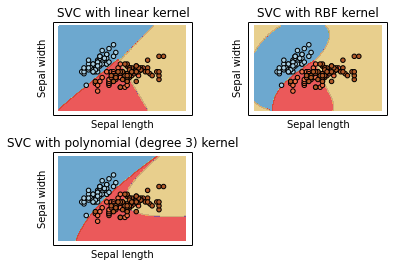

In [35]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(iris_X, iris_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(iris_X, iris_y)

# create a mesh to plot in
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

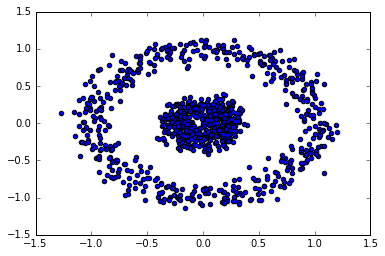

In [18]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1])

In [19]:
# let's try to predict them without graphs
logreg = LogisticRegression()
print cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()

clf = svm.SVC(kernel = 'linear')        # I like lines
print cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean(), "i like lines"


clf = svm.SVC(kernel = 'poly', degree = 3)        # I like 3rd degree polys
print cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean(), "i like 3rd degree polynomials"

clf = svm.SVC(kernel = 'rbf')           # I like circles
print cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean(), "i like circles"


0.489
0.652 i like lines
0.567 i like 3rd degree polynomials
1.0 i like circles


In [53]:
# the radial basis function fake projects the data into higher dimensions
# that accompany circles well

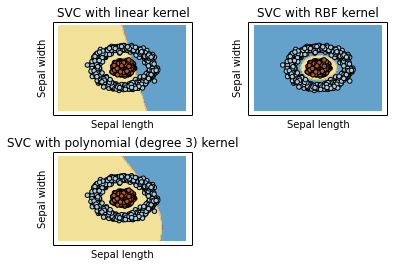

In [55]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(circles_X, circles_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(circles_X, circles_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(circles_X, circles_y)

# create a mesh to plot in
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

# a real thing of beauty

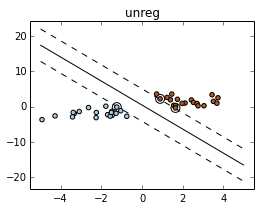

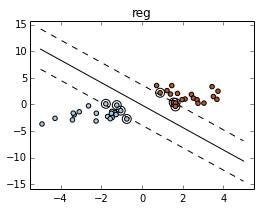

In [40]:
# Visualizing different C

X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.title(name)

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    fignum = fignum + 1

plt.show()